In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# (1) Static Attitude

collect 5 mins of data (till starsim ends) 
enable animation and set rotation speeed to 0)

In [4]:
attitude_NN = np.load('./saved_results/attitude_NN_92.npy')
attitude_GG = np.load('./saved_results/attitude_GG_83.npy')
attitude_CoM = np.load('./saved_results/attitude_CoM_100.npy')

In [5]:
NN_std = np.std(attitude_NN, axis=0) * 3600 # deg2arcsec
print(NN_std)

GG_std = np.std(attitude_GG, axis=0) * 3600 # deg2arcsec
print(GG_std)

CoM_std = np.std(attitude_CoM, axis=0) * 3600 # deg2arcsec
print(CoM_std)

[52.55005572  1.94877399  4.68926435]
[143.73856869   6.31878699  13.00288255]
[245.87403888   7.82633869  24.36435366]


# (2) Dynamic Attitude

Run NN first, then start starfield sim and collect 5 min of data (till starfield sim ends).  
200 ms exposure time.  
q = [0,0,0,1]  

In [2]:
def plot_euler_angles(attitude, fig_num):
    
    time_stamp = attitude[:,0] - attitude[0,0]

    euler_z = attitude[:,1]
    euler_y = attitude[:,2]
    euler_x = attitude[:,3]

    plt.figure(num = fig_num, figsize = (8,6)) 

    plt.subplot(3,1,1)
    plt.scatter(time_stamp, euler_z, 2, alpha = 1, color='r')
    plt.ylabel('Euler Angle (deg)', fontsize = 10, weight='bold')
    plt.grid(True, color='k', linestyle=':')

    plt.subplot(3,1,2)
    plt.scatter(time_stamp, euler_y, 2, alpha = 1, color='g')
    plt.ylabel('Euler Angle (deg)', fontsize = 10, weight='bold')
    plt.grid(True, color='k', linestyle=':')
    
    plt.subplot(3,1,3)
    plt.scatter(time_stamp, euler_x, 2, alpha = 1, color='b')
    plt.ylabel('Euler Angle (deg)', fontsize = 10, weight='bold')
    plt.xlabel('Time (seconds)', fontsize = 10, weight='bold')
    plt.grid(True, color='k', linestyle=':')

    #ax.legend(  loc='upper center', bbox_to_anchor=(0.5, 1.10),
    #            ncol=3, fancybox=True, shadow=True)
    plt.show()   

## 2.1 Neural Net

In [3]:
attitude_NN_1 = np.load('../star_tracker_simulator_detect/saved_results/first_night_sky_test/night_NN/attitude_NN_366.npy') # row 140 is an outlier 
attitude_NN_1 = np.delete(attitude_NN_1, 140, axis=0 )

attitude_NN_2 = np.load('../star_tracker_simulator_detect/saved_results/first_night_sky_test/night_NN_stray/attitude_NN_335.npy')

In [10]:
tmp_csv=pd.DataFrame(data=attitude_NN_1)
tmp_csv.to_csv(f'attitude_NN_366.csv',encoding='gbk')

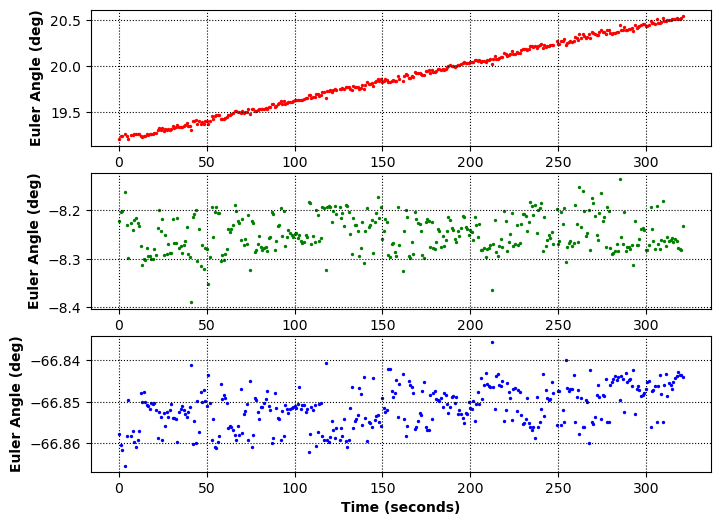

standard deviation cross boresight = 18.00779797119705 arcsec
standard deviation around boresight = 134.46685534444782 arcsec


In [7]:
#  w = np.array([ radians(15.042/3600), radians(0), radians(0) ]) # sidereal rate x y z
plot_euler_angles(attitude_NN_1, 1)

# # w = np.array([ radians(0), radians(15.042/3600), radians(0) ]) # sidereal rate
# attitude_NN_2 = np.load('./saved_results/attitude_NN_984.npy')
# plot_euler_angles(attitude_NN_2)

print(f'standard deviation cross boresight = {np.std(attitude_NN_1[:,3])*3600} arcsec')
print(f'standard deviation around boresight = {np.std(attitude_NN_1[:,2])*3600} arcsec')

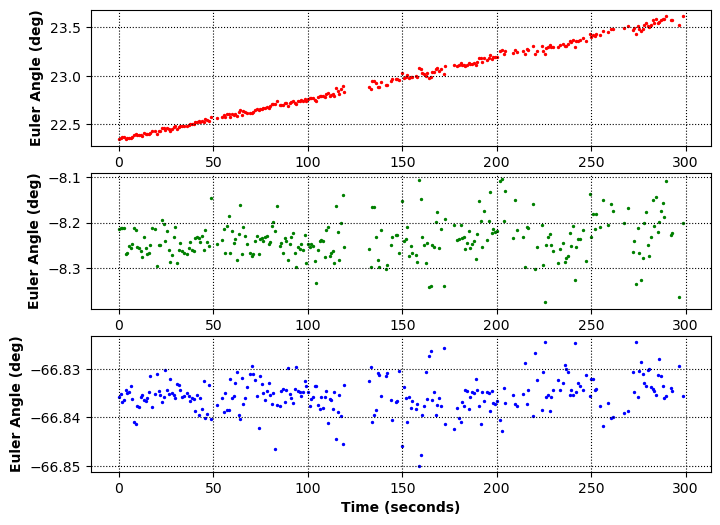

standard deviation cross boresight = 13.2960519783586 arcsec
standard deviation around boresight = 158.98924556932835 arcsec


In [8]:
plot_euler_angles(attitude_NN_2, 2)

print(f'standard deviation cross boresight = {np.std(attitude_NN_2[:,3])*3600} arcsec')
print(f'standard deviation around boresight = {np.std(attitude_NN_2[:,2])*3600} arcsec')

## 2.2 Gaussian

In [36]:
attitude_Gauss_1 = np.load('../star_tracker_simulator_detect/saved_results/night_Gauss_Erosion/attitude_baseline_287.npy') # row 140 is an outlier 
#attitude_NN_1 = np.delete(attitude_NN_1, 140, axis=0 )

attitude_Gauss_2 = np.load('../star_tracker_simulator_detect/saved_results/night_Gauss_Global/attitude_baseline_367.npy') # row 29, 88 outliers 
attitude_Gauss_2 = np.delete(attitude_Gauss_2, [29,88], axis=0 )


In [35]:
tmp_csv=pd.DataFrame(data=attitude_Gauss_2)
tmp_csv.to_csv(f'Gauss.csv',encoding='gbk')

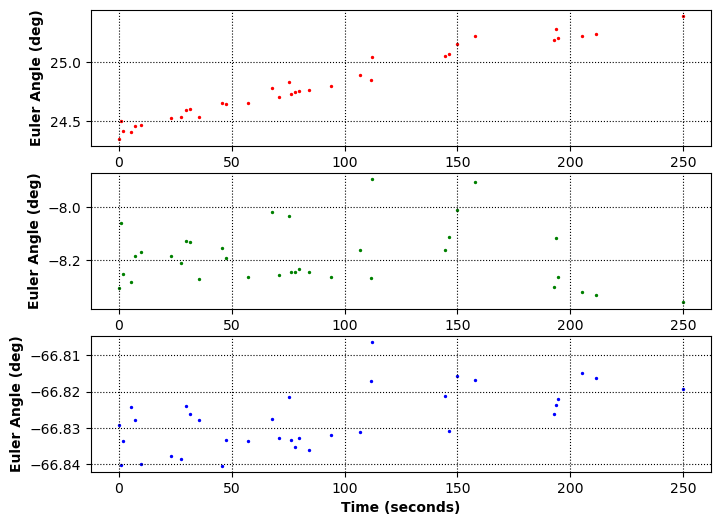

standard deviation cross boresight = 407.7518674033982 arcsec
standard deviation around boresight = 0.29174191760342444 deg


In [51]:
plot_euler_angles(attitude_Gauss_1, 2)

print(f'standard deviation cross boresight = {np.std(attitude_Gauss_1[:,2])*3600} arcsec')
print(f'standard deviation around boresight = {np.std(attitude_Gauss_1[:,1])} deg')

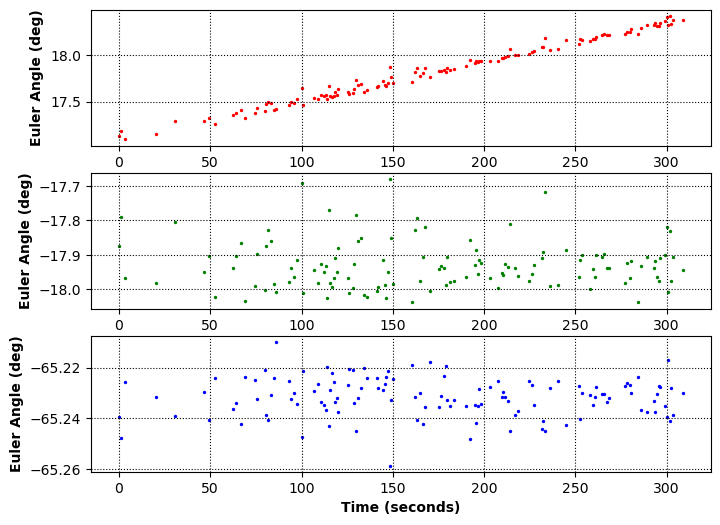

standard deviation cross boresight = 249.45936349129212 arcsec
standard deviation around boresight = 0.3321665117172283 deg


In [52]:
plot_euler_angles(attitude_Gauss_2, 2)

print(f'standard deviation cross boresight = {np.std(attitude_Gauss_2[:,2])*3600} arcsec')
print(f'standard deviation around boresight = {np.std(attitude_Gauss_2[:,1])} deg')

## 2.3 Center of Mass

In [41]:
attitude_CoM_1 = np.load('../star_tracker_simulator_detect/saved_results/night_CoM_Erosion/attitude_baseline_199.npy') # row 50 outlier 
attitude_CoM_1 = np.delete(attitude_CoM_1, 50, axis=0 )

attitude_CoM_2 = np.load('../star_tracker_simulator_detect/saved_results/night_CoM_Global/attitude_baseline_354.npy') 


In [40]:
tmp_csv=pd.DataFrame(data=attitude_CoM_1)
tmp_csv.to_csv(f'CoM.csv',encoding='gbk')

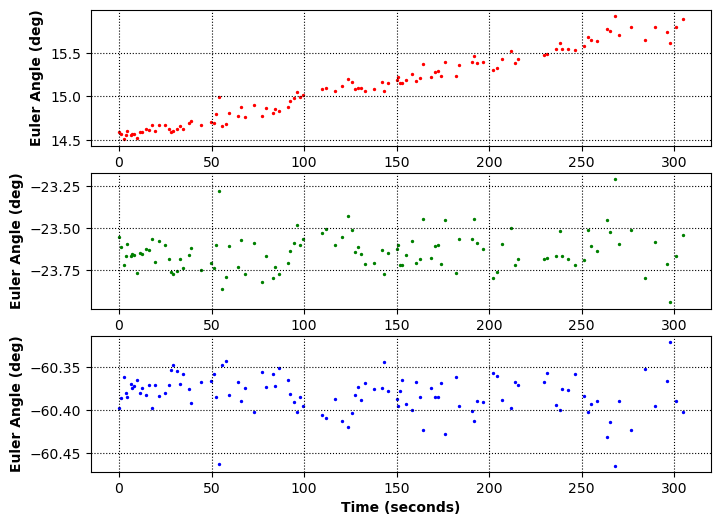

standard deviation cross boresight = 395.02460593953475 arcsec
standard deviation around boresight = 0.39100940960662917 deg


In [48]:
plot_euler_angles(attitude_CoM_1, 2)

print(f'standard deviation cross boresight = {np.std(attitude_CoM_1[:,2])*3600} arcsec')
print(f'standard deviation around boresight = {np.std(attitude_CoM_1[:,1])} deg')

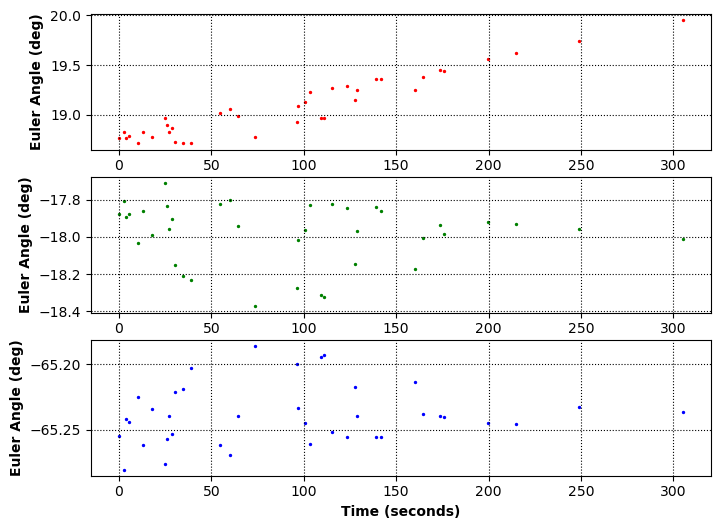

standard deviation cross boresight = 591.5183277904998 arcsec
standard deviation around boresight = 0.31414401547915816 deg


In [49]:
plot_euler_angles(attitude_CoM_2, 2)

print(f'standard deviation cross boresight = {np.std(attitude_CoM_2[:,2])*3600} arcsec')
print(f'standard deviation around boresight = {np.std(attitude_CoM_2[:,1])} deg')